In [30]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from sklearn.feature_extraction.text import TfidfVectorizer
from NeuralNMF import Neural_NMF
import pickle
import scipy.io
import random
import numpy as np


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)


mat_data = scipy.io.loadmat(r"C:\Users\ASUS\Downloads\For_Tezuka\For_Tezuka\Opto_Data_CLa18.mat")

print(mat_data["C"][0])

[array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         6.42740394e-004, 6.10910320e-004, 5.80656549e-004],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [9.48571063e-001, 8.94820508e-001, 8.44115714e-001, ...,
         3.88815240e-004, 3.66783116e-004, 3.45999437e-004],
        ...,
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         5.91954733e-176, 5.09093362e-176, 4.37830863e-176],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])
 array([[5.51901019e-004, 5.24569533e-004, 4.98591569e-004, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+0

In [60]:
mat_data["S"][0][1].shape

(81, 5959)

In [61]:
trainS = mat_data["S"][0][1]

In [62]:
timeframes = 3

In [63]:
trainData = []
for i in range(trainS.shape[1]-timeframes+1):
    segment = trainS[:,i:i+timeframes]
    flatt = segment.flatten(order='F')
    trainData.append(flatt)

trainMatrix = np.array(trainData).T

In [64]:
trainMatrix.shape

(243, 5957)

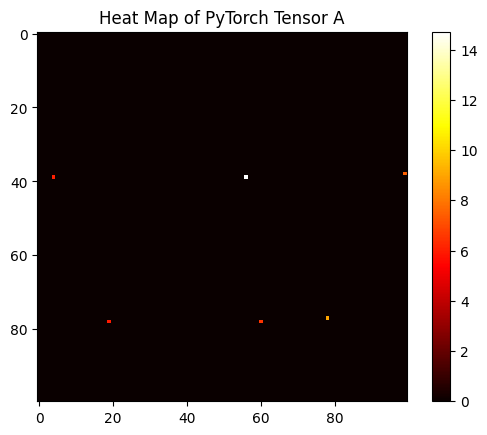

In [65]:
plt.imshow(trainMatrix[100:200,900:1000], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

In [66]:
train__ = torch.tensor(trainMatrix)

In [67]:
m, k1, k2 = 243, 50, 2
net = Neural_NMF([m, k1, k2])

In [68]:
history = train(net, train__, epoch=10, lr=500, supervised=False)

100%|██████████| 10/10 [00:30<00:00,  3.01s/it]


In [69]:
A = history[0][1]
S = history[1][1]

In [89]:
a1 = history[0][0]
a2 = history[0][1]
print(a1.shape, "   ", a2.shape)

torch.Size([243, 50])     torch.Size([50, 2])


In [91]:
a1a2 = torch.matmul(a1,a2)
a1a2.shape

torch.Size([243, 2])

In [95]:
a1a2

tensor([[13.3494, 11.5953],
        [12.1040,  9.7924],
        [10.6614,  9.2687],
        [11.7002, 10.0485],
        [13.1322, 10.4305],
        [11.7850,  9.3053],
        [12.8662,  9.9332],
        [11.1324,  9.7878],
        [12.1097, 11.9427],
        [11.0529,  8.7313],
        [12.9937,  9.5992],
        [12.1938, 10.8270],
        [11.7838,  8.5712],
        [11.7393,  9.8299],
        [11.9595,  9.8071],
        [10.3362,  8.3385],
        [12.1163,  8.8642],
        [12.2590, 11.8910],
        [ 9.7932,  8.2697],
        [11.8760,  8.0637],
        [12.1339, 10.1118],
        [12.1793,  9.0675],
        [11.6132,  9.2300],
        [11.9347, 10.5101],
        [11.4550,  9.3538],
        [10.6640,  8.9134],
        [ 8.3665,  7.9282],
        [11.4882,  8.7864],
        [10.1030,  9.4078],
        [10.2023,  7.4793],
        [ 9.8651,  8.6569],
        [12.5319, 10.4650],
        [10.0916,  8.5801],
        [13.1543, 10.0373],
        [12.8677,  8.5424],
        [10.3965,  8

In [97]:
a12_ = a1a2[:,0]
a12_.shape

torch.Size([243])

In [99]:
o,p,n = a12_[:81],a12_[81:162],a12_[162:243]

In [103]:
o,p,n = o.reshape(-1,1),p.reshape(-1,1),n.reshape(-1,1)

In [104]:
result_matrix = torch.cat((o, p, n), dim=1)

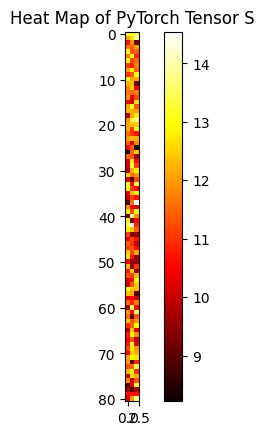

In [108]:
plt.imshow(result_matrix.detach().numpy(), cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [70]:
print(A.shape, "    ", S.shape)

torch.Size([50, 2])      torch.Size([2, 5957])


In [71]:
A1 = A.detach().numpy()
S1 = S.detach().numpy()

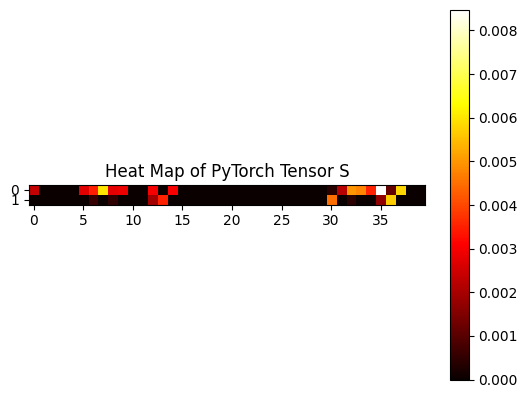

In [72]:
i = 0
plt.imshow(S1[:,i:i+40], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

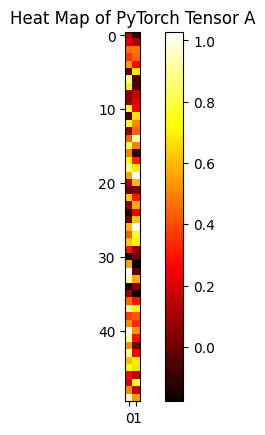

In [73]:
i = 60
plt.imshow(A1[:,:], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

In [74]:
opto = mat_data["opt"][0][0]
opto

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [75]:
count_ones = np.count_nonzero(opto == 1)
count_ones

95

In [76]:
opto.shape

(1, 6012)

In [77]:
indices = np.where(opto == 1)[1]

In [78]:
indices

array([3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3416,
       3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3714, 3715,
       3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 4012, 4013, 4014,
       4015, 4016, 4017, 4018, 4019, 4020, 4310, 4311, 4312, 4313, 4314,
       4315, 4316, 4317, 4318, 4608, 4609, 4610, 4611, 4612, 4613, 4614,
       4615, 4616, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914,
       5204, 5205, 5206, 5207, 5208, 5209, 5210, 5211, 5212, 5501, 5502,
       5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5799, 5800, 5801,
       5802, 5803, 5804, 5805, 5806, 5807, 5808], dtype=int64)

In [80]:
slices = []
for idx in indices:
    # Ensure we do not go out of bounds
    if idx + 20 <= S1.shape[1]:
        slices.append(S1[:, idx:idx+20])
    else:
        slices.append(S1[:, idx:])

In [81]:
C = np.hstack(slices) if slices else np.array([])

In [82]:
C.shape

(2, 1900)

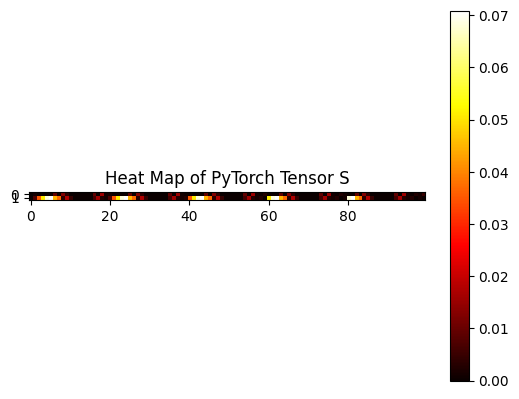

In [85]:
plt.imshow(C[:,:100], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [ ]:
import time
from IPython.display import display, clear_output
j = 200
for i in range(j,j+200,10):
    plt.figure()
    plt.imshow(C[:,i:i+60], cmap='hot', interpolation='nearest')
    plt.colorbar()  # Show color scale
    plt.title('Heat Map of PyTorch Tensor S')
    display(plt.gcf())
    time.sleep(1)
    clear_output(wait=True)


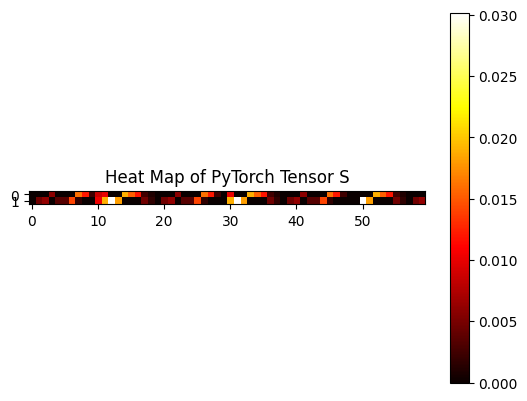

In [29]:
import matplotlib.animation as animation
from PIL import Image


fig, ax = plt.subplots()

# Create an initial heatmap
heatmap = ax.imshow(C[:, 0:60], cmap='hot', interpolation='nearest')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Update function for animation
def update(frame):
    ax.clear()
    heatmap = ax.imshow(C[:, frame:frame+60], cmap='hot', interpolation='nearest')
    plt.title('Heat Map of PyTorch Tensor S')
    return heatmap,

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=range(0, 200, 10), blit=True)

# Save the animation as a GIF
ani.save('heat_map_animation3.gif', writer='pillow', fps=1)

plt.show()